
Looking for digit directories (0-9):
  ✓ Digit 0: Found directory with 10773 files
  ✓ Digit 1: Found directory with 10773 files
  ✓ Digit 2: Found directory with 10773 files
  ✓ Digit 3: Found directory with 10773 files
  ✓ Digit 4: Found directory with 10773 files
  ✓ Digit 5: Found directory with 10773 files
  ✓ Digit 6: Found directory with 10773 files
  ✓ Digit 7: Found directory with 10773 files
  ✓ Digit 8: Found directory with 10773 files
  ✓ Digit 9: Found directory with 10773 files
Loading images from your dataset...
Error: [Errno 2] No such file or directory: '0'
Using sample digits dataset instead...


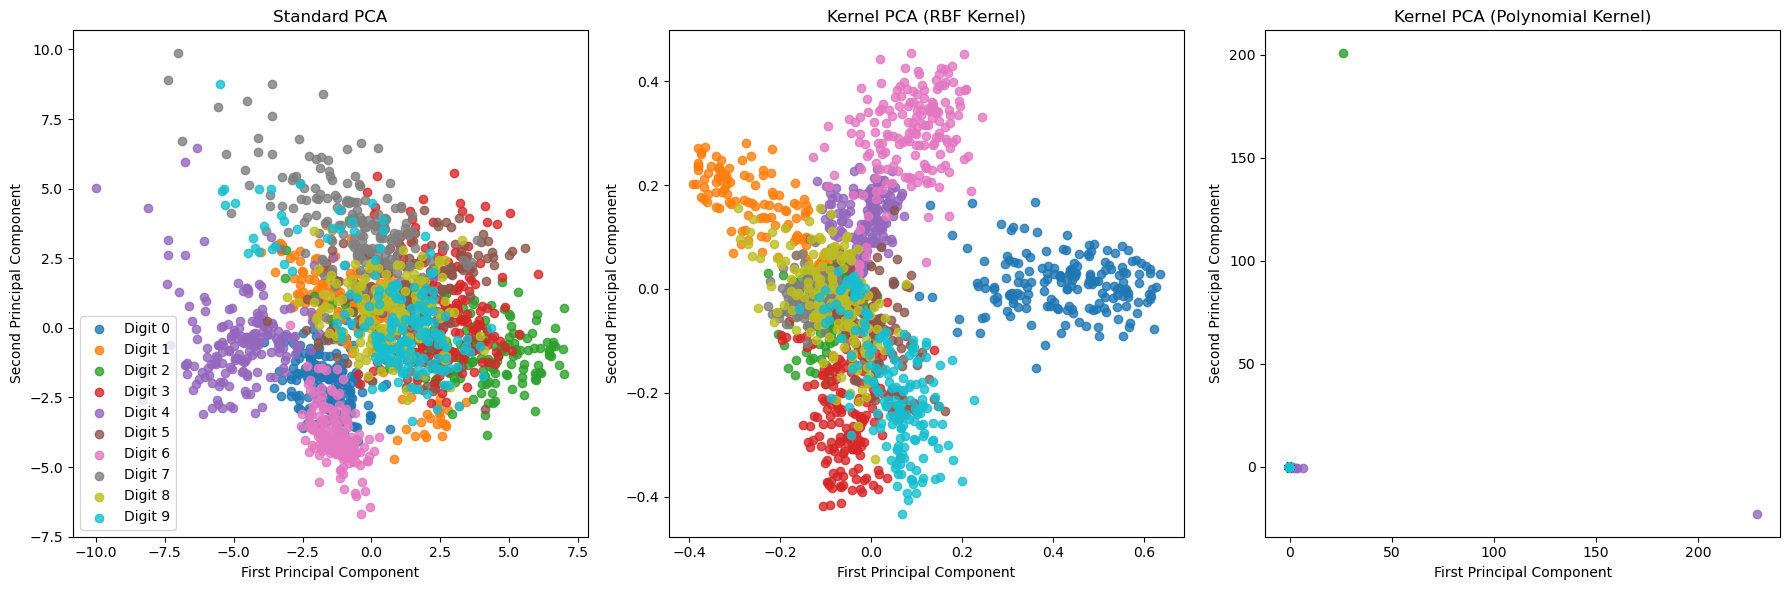

Explained variance ratio (Standard PCA): [0.12033916 0.09561054]
Total explained variance (Standard PCA): 0.2159


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import os
from PIL import Image

# Function to load and preprocess images
def load_digit_images(digit_dirs):
    """
    Load images from digit directories and preprocess them for PCA/KPCA
    """
    images = []
    labels = []
    
    for digit_dir in digit_dirs:
        digit = os.path.basename(digit_dir)
        files = os.listdir(digit_dir)
        
        for file in files:
            file_path = os.path.join(digit_dir, file)
            if os.path.isfile(file_path):
                try:
                    img = Image.open(file_path).convert('L')  # Convert to grayscale
                    img = img.resize((28, 28))  # Resize to standard size
                    img_array = np.array(img).flatten()  # Flatten the image
                    
                    images.append(img_array)
                    labels.append(int(digit))
                except:
                    continue
    
    return np.array(images), np.array(labels)

# If you don't have your own dataset, use sklearn's digits dataset
def get_sample_data():
    """
    Get sample digits data if no custom dataset is available
    """
    digits = load_digits()
    return digits.data, digits.target

# Main function to perform PCA and Kernel PCA
def compare_pca_kpca(X, y, n_components=2):
    """
    Compare standard PCA with Kernel PCA
    
    Parameters:
    X: Input data (flattened images)
    y: Labels
    n_components: Number of components to keep
    """
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply standard PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Apply Kernel PCA with RBF kernel
    kpca_rbf = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.04)
    X_kpca_rbf = kpca_rbf.fit_transform(X_scaled)
    
    # Apply Kernel PCA with polynomial kernel
    kpca_poly = KernelPCA(n_components=n_components, kernel='poly', degree=3)
    X_kpca_poly = kpca_poly.fit_transform(X_scaled)
    
    # Visualize the results
    plt.figure(figsize=(18, 6))
    
    # Plot standard PCA
    plt.subplot(1, 3, 1)
    for i in range(10):  # Assuming 10 digits (0-9)
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=0.8, label=f'Digit {i}')
    plt.title('Standard PCA')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()
    
    # Plot Kernel PCA with RBF kernel
    plt.subplot(1, 3, 2)
    for i in range(10):
        plt.scatter(X_kpca_rbf[y == i, 0], X_kpca_rbf[y == i, 1], alpha=0.8, label=f'Digit {i}')
    plt.title('Kernel PCA (RBF Kernel)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
    # Plot Kernel PCA with polynomial kernel
    plt.subplot(1, 3, 3)
    for i in range(10):
        plt.scatter(X_kpca_poly[y == i, 0], X_kpca_poly[y == i, 1], alpha=0.8, label=f'Digit {i}')
    plt.title('Kernel PCA (Polynomial Kernel)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and print explained variance for standard PCA
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance ratio (Standard PCA): {explained_variance}")
    print(f"Total explained variance (Standard PCA): {sum(explained_variance):.4f}")
    
    return pca, kpca_rbf, kpca_poly

# Main execution
try:
    # Try to use your dataset first
    digit_dirs = find_digit_directories()  # Assuming this function exists from your code
    if digit_dirs:
        print("Loading images from your dataset...")
        X, y = load_digit_images(digit_dirs)
    else:
        print("Using sample digits dataset...")
        X, y = get_sample_data()
    
    # Compare PCA and Kernel PCA
    pca, kpca_rbf, kpca_poly = compare_pca_kpca(X, y)
    
    # Additional visualization: reconstructing images from PCA components
    if X.shape[1] >= 64:  # If we have enough features for a meaningful reconstruction
        n_components_reconstruction = 20
        pca_recon = PCA(n_components=n_components_reconstruction)
        X_transformed = pca_recon.fit_transform(X)
        X_reconstructed = pca_recon.inverse_transform(X_transformed)
        
        # Show original vs reconstructed images for a few samples
        plt.figure(figsize=(12, 6))
        for i in range(5):  # Show 5 examples
            # Original image
            plt.subplot(2, 5, i+1)
            img_size = int(np.sqrt(X.shape[1]))
            plt.imshow(X[i].reshape(img_size, img_size), cmap='gray')
            plt.title(f"Original: {y[i]}")
            plt.axis('off')
            
            # Reconstructed image
            plt.subplot(2, 5, i+6)
            plt.imshow(X_reconstructed[i].reshape(img_size, img_size), cmap='gray')
            plt.title(f"Reconstructed: {y[i]}")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
except Exception as e:
    print(f"Error: {e}")
    print("Using sample digits dataset instead...")
    X, y = get_sample_data()
    pca, kpca_rbf, kpca_poly = compare_pca_kpca(X, y)